In [ ]:
import pandas as pd

In [ ]:
file_name = 'georeferenced-address-5.csv'
georeferenced_address_df = pd.read_csv(file_name, sep='\t')
georeferenced_address_df

In [ ]:
# Filtering outlyers -74.204251, 4.485794, -74.017856, 4.781398
georeferenced_address_df.describe()

bogota_geoaddress_df = georeferenced_address_df.query('Latitude >= 4.485794 and Latitude<= 4.781398').query('Longitude >= -74.204251 and Longitude<= -74.017856')

bogota_geoaddress_df.describe()


In [ ]:
import geopandas
from geodatasets import get_path
import geodatasets

bogota = geopandas.read_file(geodatasets.get_path('geoda.malaria'))

gdf = geopandas.GeoDataFrame(
    bogota_geoaddress_df, geometry=geopandas.points_from_xy(bogota_geoaddress_df.Longitude, bogota_geoaddress_df.Latitude), crs="EPSG:4326"
)


In [ ]:
! pip3 install contextily

In [ ]:

import contextily as cx

bogota.clip([-74.204251, 4.485794, -74.017856, 4.781398]).crs

df_wm = gdf.to_crs(epsg=3857)

ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k", markersize=1)
cx.add_basemap(ax)



In [ ]:
import matplotlib.pyplot as plt
! pip install folium matplotlib mapclassify

In [ ]:
#https://geopandas.org/en/stable/gallery/plotting_basemap_background.html
#https://github.com/geopandas/geopandas/blob/main/doc/source/gallery/plotting_basemap_background.ipynb

#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

#bogota = geopandas.read_file(geodatasets.get_path('geoda.malaria'))

df_wm = gdf.to_crs(epsg=3857)

#ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k", linewidth=1, markersize=5)
#ax = df_wm.plot(alpha=0.5, edgecolor="white", linewidth=1, markersize=1)

ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k", markersize=1)

cx.add_basemap(ax)

# We restrict to South America.
#ax = bogota.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot(figsize=(10, 10), edgecolor='white', linewidth=2, color='lightblue')

# We can now plot our ``GeoDataFrame``.
#gdf.plot(figsize=(10, 10), ax=ax, color='red', linewidth=1, markersize=1)
#gdf.plot( ax=ax, color='red', linewidth=1, markersize=1)

gdf.explore(style_kwds=dict(color="red"),  markersize=1)

# gdf.explore(
#     #column="BoroName",  # make choropleth based on "BoroName" column
#     #tooltip="BoroName",  # show "BoroName" value in tooltip (on hover)
#     popup=True,  # show all values in popup (on click)
#     tiles="CartoDB positron",  # use "CartoDB positron" tiles
#     cmap="Set1",  # use "Set1" matplotlib colormap
#     style_kwds=dict(color="black"),  # use black outline
# )

#plt.show()

Final map visualization

In [2]:
import pandas as pd

In [3]:
file_name = 'georeferenced-address-5.csv'
georeferenced_address_df = pd.read_csv(file_name, sep='\t')
georeferenced_address_df

Unnamed: 0          Address  Latitude  Longitude
0              0       KR 80-CL 2  4.623609 -74.139402
1              1    CL 1-KR 148 S  4.621763 -74.126449
2              2    KR 45-CL 129B  4.724499 -74.088205
3              3   CL 78-KR 87I S  4.702979 -74.102601
4              4     KR 2A-CL 22A  4.678437 -74.142518
...          ...              ...       ...        ...
8857        8857     CL 12A-KR 71  4.642984 -74.128938
8858        8858  KR 78A-CL 65F S  4.649978 -74.060374
8859        8859    KR 36A-CL 63C  4.654936 -74.076491
8860        8860     CL 165-KR 87  4.741132 -74.023107
8861        8861   CL 66-KR 17C S  4.658638 -74.072567

[8862 rows x 4 columns]

In [6]:
# Filtering outlyers -74.204251, 4.485794, -74.017856, 4.781398
georeferenced_address_df.describe()

bogota_geoaddress_df = georeferenced_address_df.query('Latitude >= 4.485794 and Latitude<= 4.781398').query('Longitude >= -74.204251 and Longitude<= -74.017856')

bogota_geoaddress_df.describe()

Unnamed: 0     Latitude    Longitude
count  8773.000000  8773.000000  8773.000000
mean   4434.523994     4.658441   -74.094413
std    2558.735274     0.051332     0.039043
min       0.000000     4.489016   -74.203931
25%    2217.000000     4.619635   -74.122107
50%    4439.000000     4.654086   -74.091140
75%    6648.000000     4.697157   -74.066489
max    8861.000000     4.780215   -74.019031

In [7]:
import geopandas

gdf = geopandas.GeoDataFrame(
    bogota_geoaddress_df, geometry=geopandas.points_from_xy(bogota_geoaddress_df.Longitude, bogota_geoaddress_df.Latitude), crs="EPSG:4326"
)

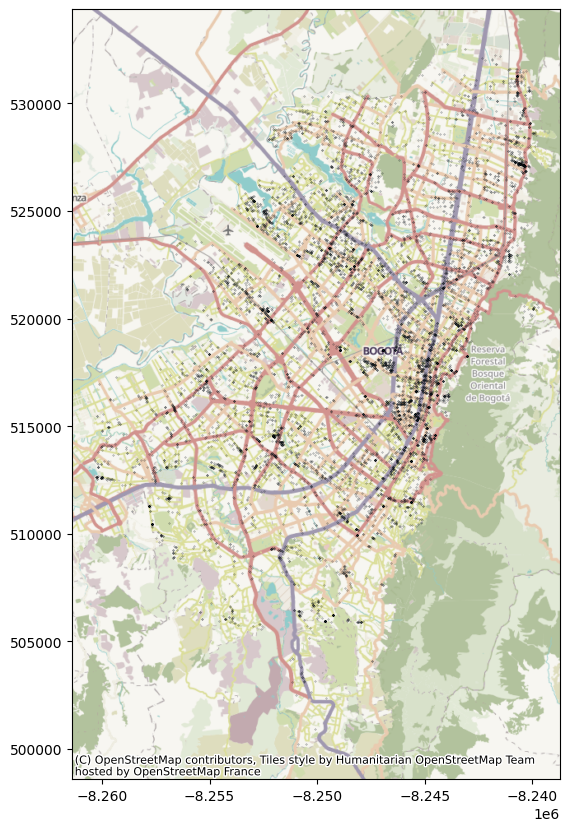

In [29]:
import contextily as cx

df_wm = gdf.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k", markersize=0.1)
cx.add_basemap(ax)
gdf.explore(style_kwds=dict(color="red", markersize=0.01), marker_kwds=dict(radius=0.5))

#gdf.explore(style_kwds=dict(stroke=True,weight=0.1,color='black', opacity=0.5, fillOpacity=0.9), marker_kwds=dict(radius=1),  markersize=0.01)

            
                   